C:\Users\Arogya Mary\AppData\Local\Temp\ipykernel_1664\3736131349.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date MM/DD/YYYY'] = pd.to_datetime(df['Date MM/DD/YYYY'])


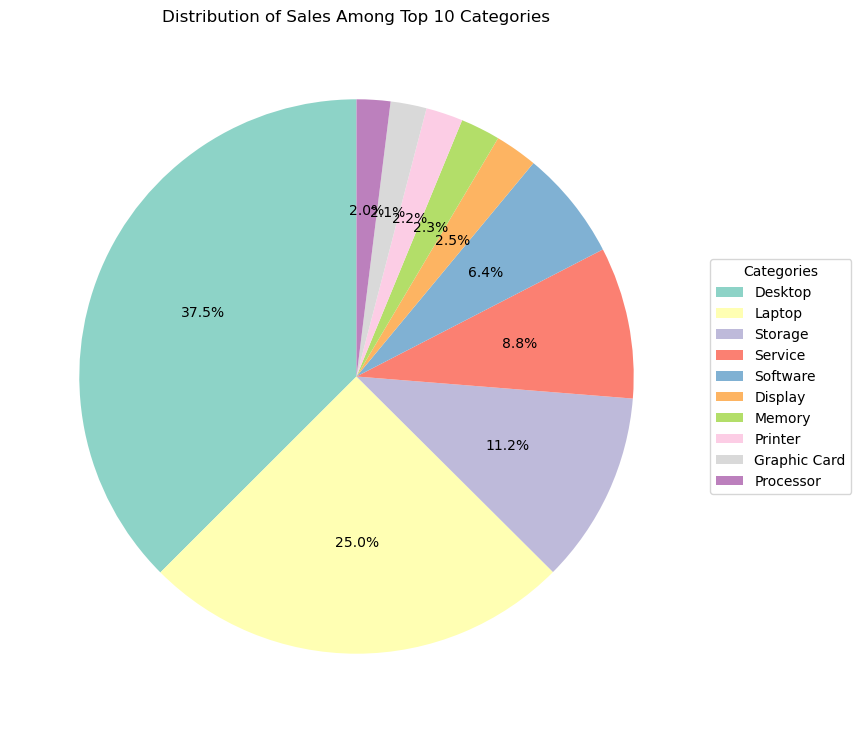

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("final_complete.csv")
df['Date MM/DD/YYYY'] = pd.to_datetime(df['Date MM/DD/YYYY'])
df.set_index('Date MM/DD/YYYY', inplace=True)
category_sales = df.groupby('Category')['Total Amount.1'].sum()
top_10_categories = category_sales.sort_values(ascending=False).head(10)
presentable_colors = sns.color_palette("Set3", n_colors=len(top_10_categories))
plt.figure(figize=(10, 9))
wedges, texts, autotexts = plt.pie(top_10_categories, labels=None, autopct='', startangle=90, colors=presentable_colors)
percentage_labels = [f'{p:.1f}%' for p in top_10_categories / top_10_categories.sum() * 100]
for autotext, label in zip(autotexts, percentage_labels):
    autotext.set_text(label)
plt.legend(top_10_categories.index, title='Categories', bbox_to_anchor=(1, 0.5), loc='center left')

plt.title('Distribution of Sales Among Top 10 Categories')
plt.show()


# the below bar graph shows the top 10 products sold or services offered to the companies 
# more sustained  profit comes from the desktop category
#profits are gained and sustained through desktop,laptop and storage categories


In [128]:
# counting the number of companies
import pandas as pd
df = pd.read_csv("final_complete.csv")
num_companies = df['Company'].nunique()
print(f'The number of companies is: {num_companies}')
# so the number of companies are 15

The number of companies is: 15


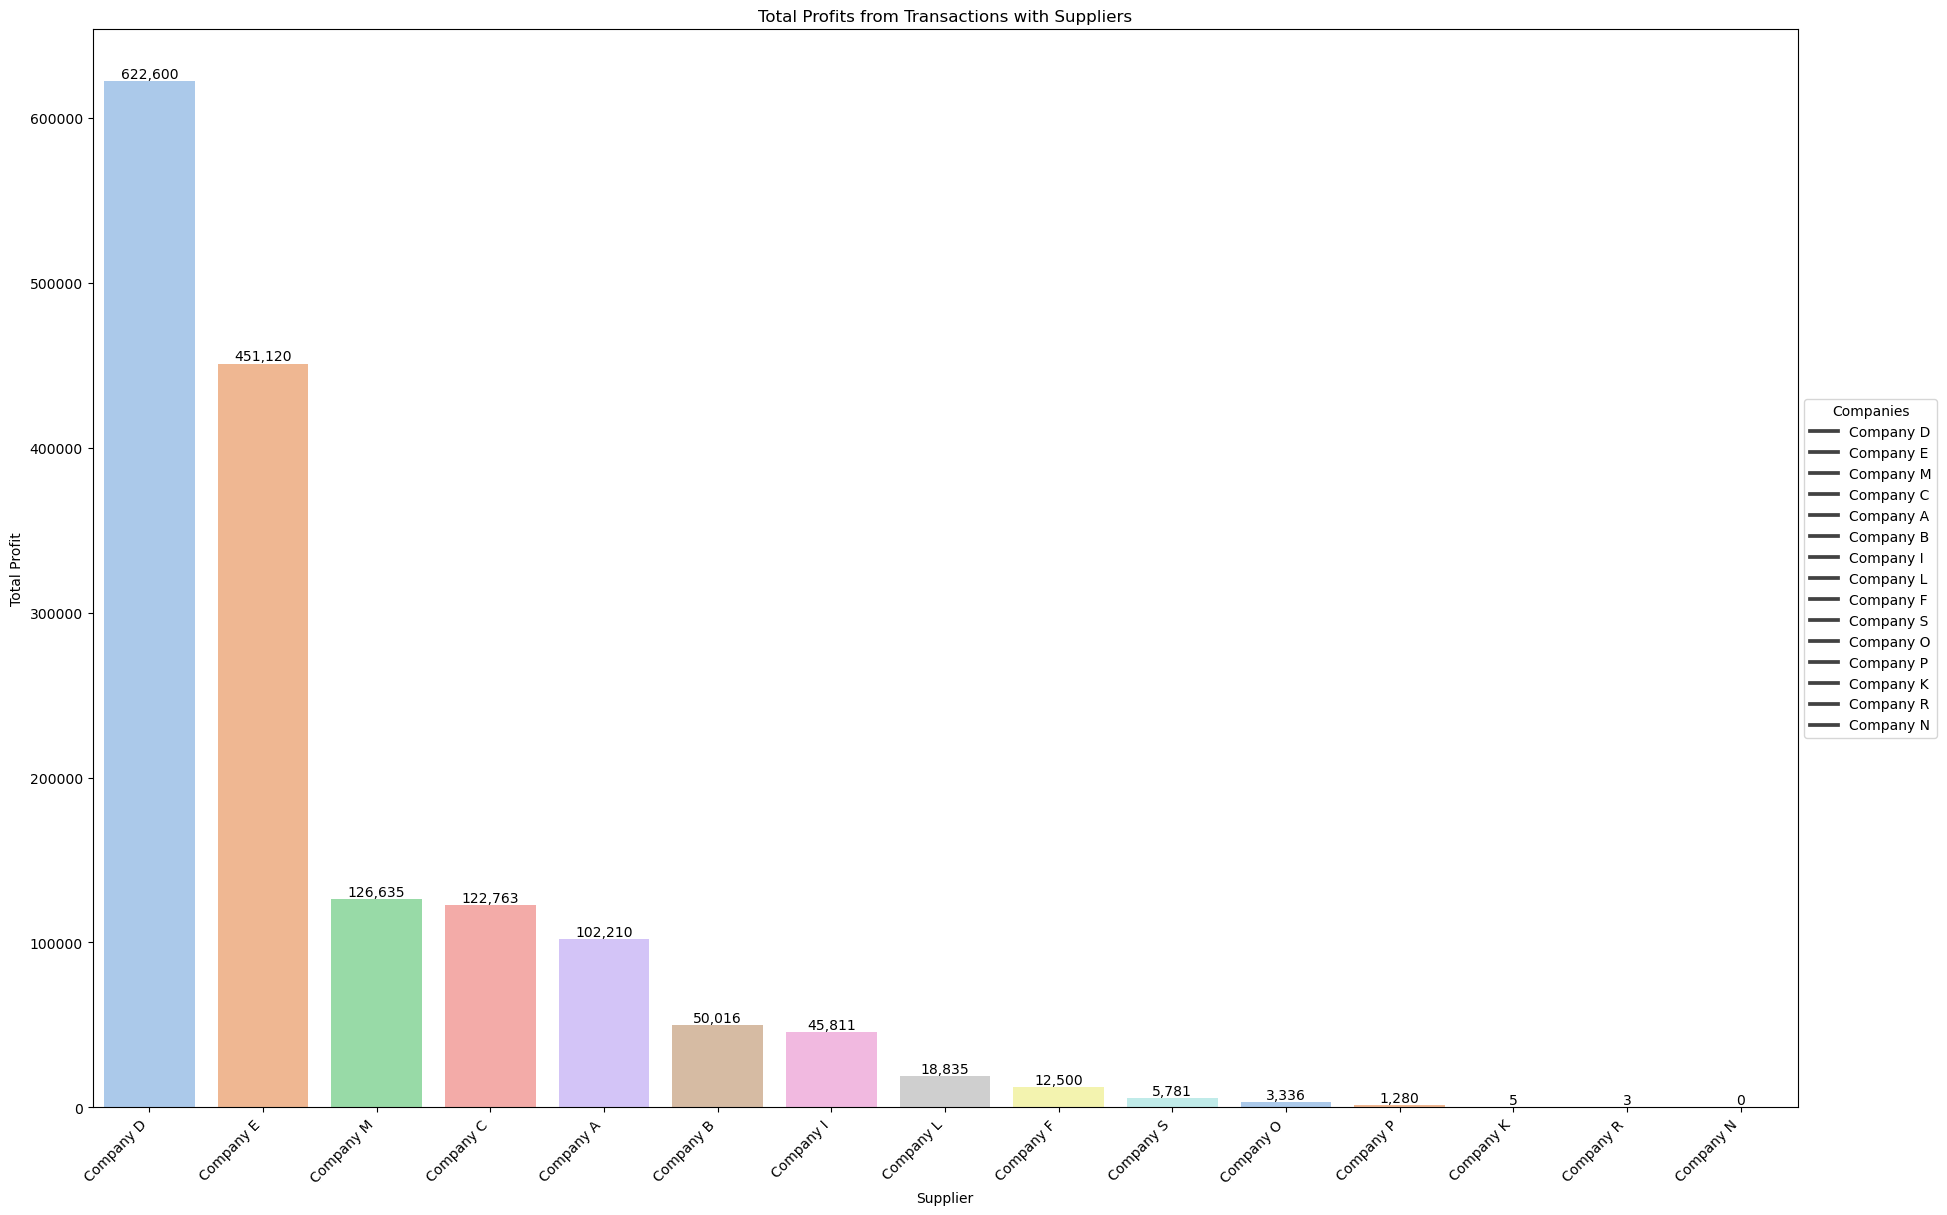

In [63]:
# Total Profit from Transactions with Suppliers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("final_complete.csv")# Calculating profit per company
company_profit = df.groupby('Company')['Profit / Invoice'].sum().reset_index()
company_profit = company_profit.sort_values(by='Profit / Invoice', ascending=False)
colors = sns.color_palette("pastel", len(company_profit))
plt.figure(figsize=(22, 14))
bar_plot = sns.barplot(x='Company', y='Profit / Invoice', data=company_profit, palette=colors)
for index, value in enumerate(company_profit['Profit / Invoice']):
    bar_plot.text(index, value, f'{value:,.0f}', ha='center', fontsize=10, color='black', va='bottom')

plt.title('Total Profits from Transactions with Suppliers')
plt.xlabel('Supplier')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Profit')
plt.legend(company_profit['Company'], title='Companies', bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()
# Inferences 
# Company D is the most profitable supplier, contributing a substantial total profit of 622,600.
# Building a strong and sustainable relationship with Company D could be crucial for consistent profitability.

# Companies E and M also play significant roles, contributing 451,120 and 126,635 in total profit, respectively.
# Exploring ways to optimize transactions with these suppliers could enhance overall profitability.

# Company A, Company C, and Company I show respectable total profits, indicating reliable and profitable partnerships.
# Continuously fostering these relationships could contribute to stable and sustained business growth.

# Company N shows a total profit of 0, suggesting no profit generated from transactions with this supplier.
# Reevaluating the relationship or exploring alternative suppliers in this case might be necessary.

# Companies B, F, K, L, O, P, R, and S, while contributing to total profit, have comparatively smaller impacts.
# Monitoring and optimizing transactions with these suppliers can still contribute to incremental growth.

# The data provides a clear understanding of the most significant contributors to the company's profit from suppliers.
# Using this information, the company can prioritize and allocate resources effectively to strengthen relationships with key suppliers.

# Regularly analyzing and updating the list of suppliers based on their profitability can lead to more informed and strategic decisions.
# This, in turn, enhances the company's efficiency, reduces costs, and ensures a more robust and resilient supply chain.


C:\Users\Arogya Mary\AppData\Local\Temp\ipykernel_1664\2141451048.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date MM/DD/YYYY'] = pd.to_datetime(df['Date MM/DD/YYYY'])


<Figure size 1200x600 with 0 Axes>

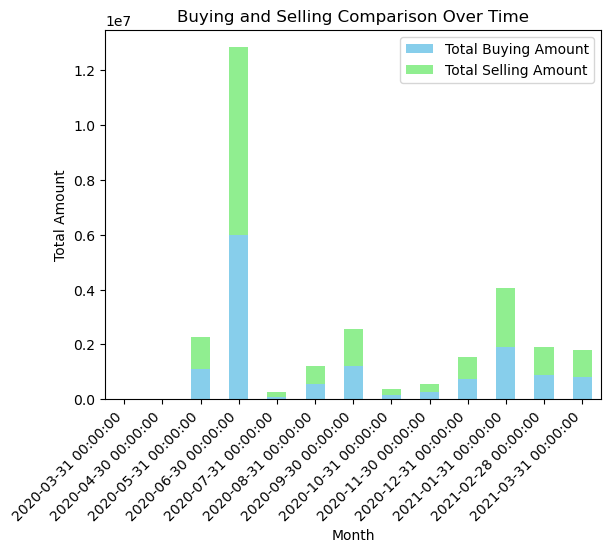

In [76]:
#Buying and Selling Comparison Over Time
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("final_complete.csv")
df['Date MM/DD/YYYY'] = pd.to_datetime(df['Date MM/DD/YYYY'])
df.set_index('Date MM/DD/YYYY', inplace=True)
plt.figure(figsize=(12, 6))
buying_selling_colors = ['skyblue', 'lightgreen']  # Blue for Buying, Green for Selling
df.resample('M')[['Total Amount', 'Total Amount.1']].sum().plot(kind='bar', stacked=True, color=buying_selling_colors)
plt.title('Buying and Selling Comparison Over Time')
plt.xlabel('Month')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Amount')
plt.legend(["Total Buying Amount", "Total Selling Amount"])
plt.show()
# this tells us the ratio of profit and loss which is buying and selling over time.
#The profit margins are average interms of buying and selling but consistantly maintained per month even with the covid shocks.
#It appears that the covid shocks and lockdown coubled with a global crash did not effect the company  much as the sales
#remain sustainable and are dependent on the relationship building while providing certain opportunities in the wake of the meltdown

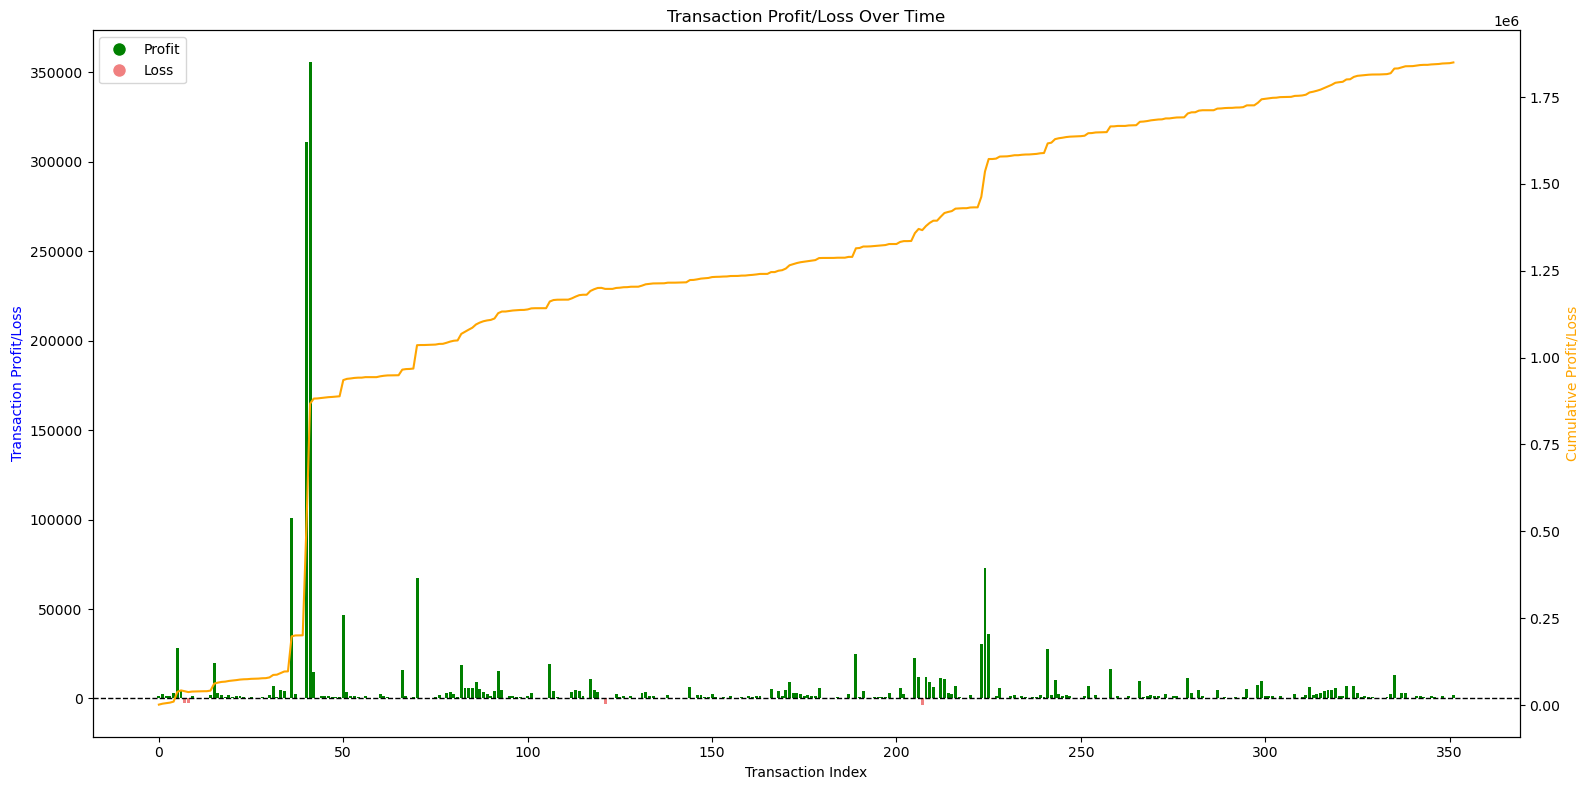

In [153]:
# Profit and Loss Distribution
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("final_complete.csv")
df['Transaction Profit/Loss'] = df['Nett Selling Price'] - df['Total Incoming Price']

fig, ax1 = plt.subplots(figsize=(16, 8))

# Bar plot for individual transactions
colors = df['Transaction Profit/Loss'].apply(lambda x: 'green' if x >= 0 else 'lightcoral')
ax1.bar(df.index, df['Transaction Profit/Loss'], color=colors, label='Transaction Profit/Loss')
ax1.set_xlabel('Transaction Index')
ax1.set_ylabel('Transaction Profit/Loss', color='blue')
ax1.axhline(0, color='black', linestyle='--', linewidth=1)

# Line plot for cumulative Profit/Loss
ax2 = ax1.twinx()
cumulative_profit_loss = df['Transaction Profit/Loss'].cumsum()
ax2.plot(df.index, cumulative_profit_loss, color='orange', label='Cumulative Profit/Loss')
ax2.set_ylabel('Cumulative Profit/Loss', color='orange')

# Title and legend
plt.title('Transaction Profit/Loss Over Time')
fig.tight_layout()

# Legend for color indications
profit_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Profit')
loss_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightcoral', markersize=10, label='Loss')
plt.legend(handles=[profit_patch, loss_patch], loc='upper left')

plt.show()



# Inferences on Profit and Loss Distribution
# as you can see the profit /loss is more indicating a stable and potential profiting.
# The company has achieved a substantial total profit of Rs1860759.06, representing 99.4% of the financial outcome.
# This highlights a strong financial performance, indicating successful sales and effective cost management strategies.

# While the overall financial picture is overwhelmingly positive, there is a marginal total loss of Rs11213.94, constituting only 0.6%.
# This small percentage of loss suggests that the company has been able to mitigate risks and minimize negative financial impacts.
# Also this company plays it very safe and what ever loss exists is probably to keep the existing relations.

# The predominance of profit showcases the company's ability to generate revenue and maintain a healthy bottom line.
# Continued focus on profit-generating activities and strategic financial management will contribute to sustained success.



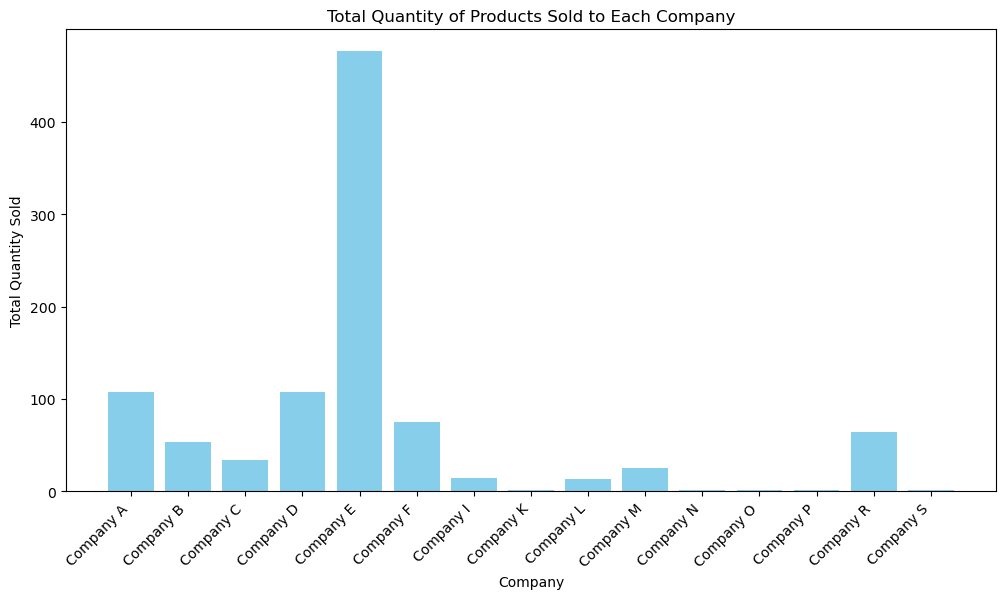

In [108]:
# quantity of products sold
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("final_complete.csv")
company_sales = df.groupby('Company')['Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(company_sales['Company'], company_sales['Quantity'], color='skyblue')
plt.title('Total Quantity of Products Sold to Each Company')
plt.xlabel('Company')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()
# these are the number products sold for each company.
# this tells us the need of a product for a particular company
# this tells us that most of the products are sold to company E 

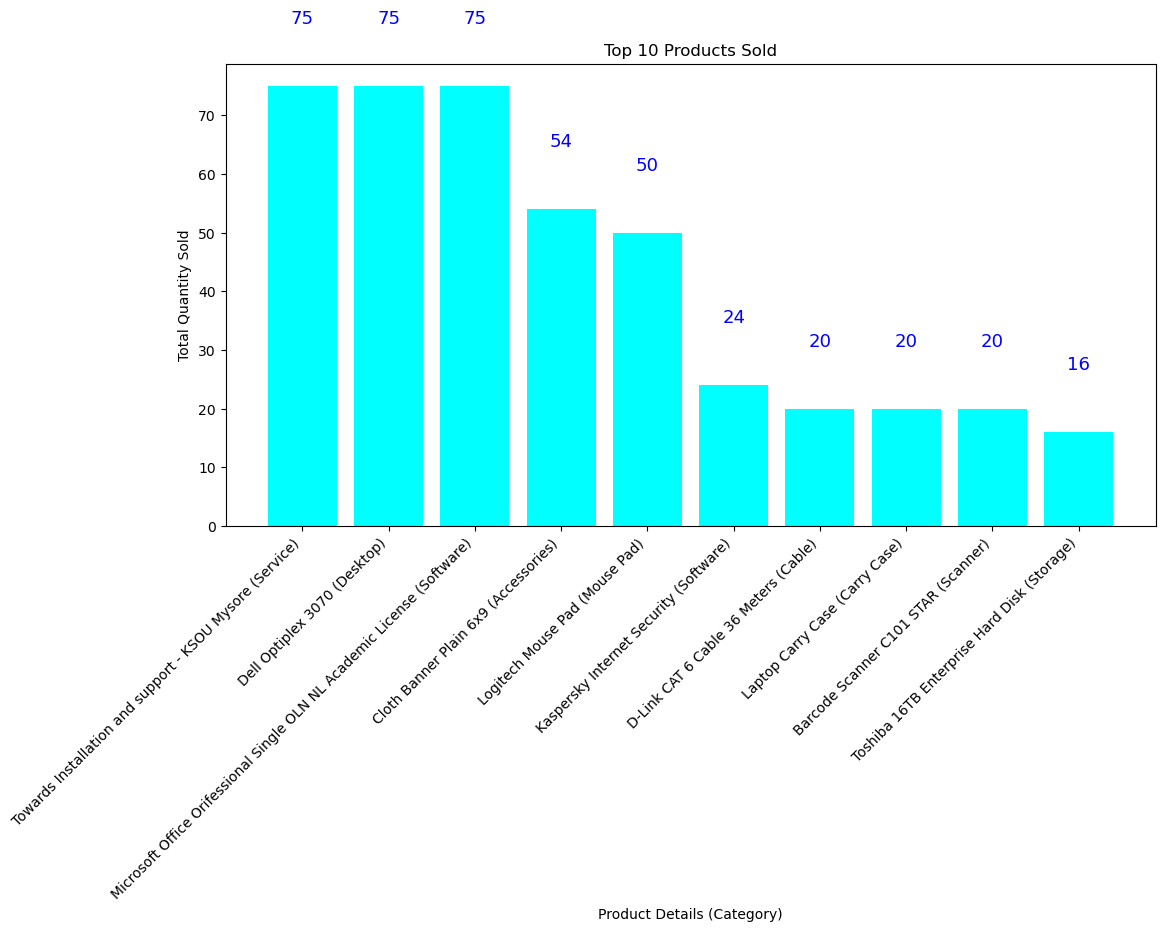

In [122]:
# top 10 products sold.
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("final_complete.csv")

product_sales = df.groupby(['Category', 'Product Details'])['Quantity'].sum().reset_index()

top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bar_plot = plt.bar(top_10_products['Product Details'] + ' (' + top_10_products['Category'] + ')',
                   top_10_products['Quantity'], color='cyan')

for index, value in enumerate(top_10_products['Quantity']):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=13, color='blue')

plt.title('Top 10 Products Sold')
plt.xlabel('Product Details (Category)')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

# these are the top 10 products being sold under their respective category.
# the quantity of products sold or services done ranges from 16 to 75.
# the installation belonging to to the service category is required by most of the companies.
# and on the product side , Dell Optiplex 3070 from the desktop category is sold the most.


In [119]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("final_complete.csv")
product_sales = df.groupby('Product Details')['Quantity'].sum().reset_index()
least_10_products = product_sales.sort_values(by='Quantity', ascending=True).head(10)
print("Least 10 Products Sold:")
print(least_10_products[['Product Details', 'Quantity']])
# these are the least 10 products which are beimg sold.

Least 10 Products Sold:
                                       Product Details  Quantity
117                                 Laptop Adapter USB         1
129                        Laptop Lenovo X240 KeyBoard         1
130           Laptop Memory 8GB DDR3 1600 MHz Kingston         1
131              Laptop Memory Module 4GB Job Code 978         1
132                      Laptop Memory Module 4Gb DDR4         1
134  Laptop Repair Charges Dell Latitude 3540 Job C...         1
135    Laptop Repair Charges Lenovo L460 Job Code 0244         1
136  Laptop Repair Charges Lenovo T450 Passwoerd Re...         1
137    Laptop Screen TFT / LED Lenovo Ideapad 530s 14"         1
128                        Laptop Lenovo L460 KeyBoard         1


In [8]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for 'Profit / Invoice'
profit_skewness = skew(df['Profit / Invoice'])
profit_kurtosis = kurtosis(df['Profit / Invoice'])

print(f"Skewness for 'Profit / Invoice': {profit_skewness}")
print(f"Kurtosis for 'Profit / Invoice': {profit_kurtosis}")
#the profit gained is highly skewed and highly leptokurtic.

Skewness for 'Profit / Invoice': 11.27388172933612
Kurtosis for 'Profit / Invoice': 136.62906569380544


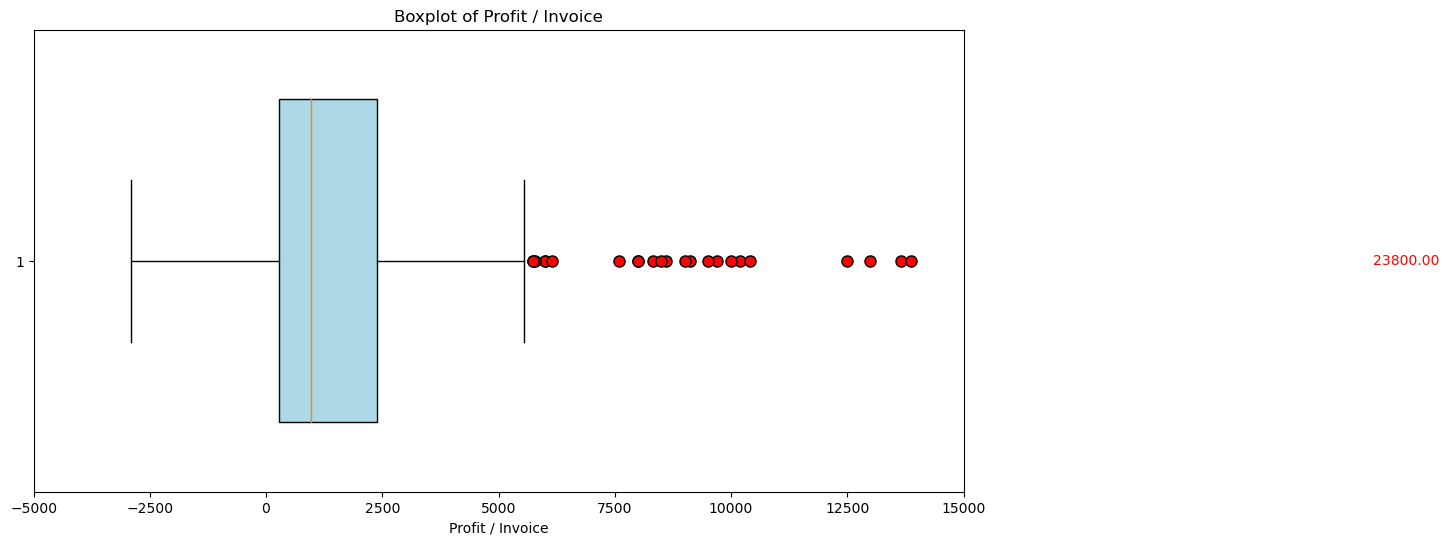

In [106]:
#showing outliers of profit
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Boxplot with outliers displayed
boxplot = plt.boxplot(df['Profit / Invoice'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue'),
                      showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

plt.title('Boxplot of Profit / Invoice')
plt.xlabel('Profit / Invoice')
plt.xlim(-5000, 15000)  # Adjust the values based on your desired zoom level

# Adding labels for outliers
outliers = [f.get_xdata()[0] for f in boxplot['fliers']]
for value in outliers:
    plt.text(value, 1, f'{value:.2f}', va='center', ha='left', color='red')

plt.show()
#The boxplot of profit per invoice reveals a wide distribution with numerous outliers,
#indicating significant variability in profitability across transactions,
#with some instances showing exceptionally high profits.

In [150]:
import pandas as pd
from scipy.stats import skew, kurtosis

def analyze_quarter(data, quarter_number):
    quarter_data = data[data['Quarter'] == quarter_number]
    skewness = skew(quarter_data['Profit / Invoice'])
    kurt = kurtosis(quarter_data['Profit / Invoice'])
    first_quartile = quarter_data['Profit / Invoice'].quantile(0.25)
    third_quartile = quarter_data['Profit / Invoice'].quantile(0.75)
    
    top_company = quarter_data.groupby('Company')['Profit / Invoice'].sum().idxmax()
    num_transactions = len(quarter_data)
    total_profit = quarter_data['Profit / Invoice'].sum()

    # Display results
    print(f"Analysis for Quarter {quarter_number}:")
    print(f"Top Company: {top_company}")
    print(f"Number of Transactions: {num_transactions}")
    print(f"Total Profit: {total_profit}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurt}")
    print(f"First Quartile: {first_quartile}")
    print(f"Third Quartile: {third_quartile}")
    print("\n")

# Assuming df is your DataFrame
df = pd.read_csv("new_project_data.csv")  # Replace with the actual file path

# Convert 'Date MM/DD/YYYY' to datetime format
df['Date MM/DD/YYYY'] = pd.to_datetime(df['Date MM/DD/YYYY'])

# Extract Quarter information
df['Quarter'] = df['Date MM/DD/YYYY'].dt.quarter

# Analyze Quarter 1
analyze_quarter(df, 1)



Analysis for Quarter 1:
Top Company: Company E
Number of Transactions: 156
Total Profit: 440663
Skewness: 5.898167219348341
Kurtosis: 44.93833717375397
First Quartile: 332.25
Third Quartile: 2281.25




C:\Users\Arogya Mary\AppData\Local\Temp\ipykernel_1664\4047227977.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date MM/DD/YYYY'] = pd.to_datetime(df['Date MM/DD/YYYY'])


In [86]:
# quarterly insights
import pandas as pd
from scipy.stats import skew, kurtosis

def analyze_quarter(data, quarter_number):
   quarter_data = data[data['Quarter'] == quarter_number]
skewness = skew(quarter_data['Profit / Invoice'])
    kurt = kurtosis(quarter_data['Profit / Invoice'])

    first_quartile = quarter_data['Profit / Invoice'].quantile(0.25)
    third_quartile = quarter_data['Profit / Invoice'].quantile(0.75)
    
     top_company = quarter_data.groupby('Company')['Profit / Invoice'].sum().idxmax()
    num_transactions = len(quarter_data)
    total_profit = quarter_data['Profit / Invoice'].sum()

    print(f"Analysis for Quarter {quarter_number}:")
    print(f"Top Company: {top_company}")
    print(f"Number of Transactions: {num_transactions}")
    print(f"Total Profit: {total_profit}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurt}")
    print(f"First Quartile: {first_quartile}")
    print(f"Third Quartile: {third_quartile}")
    print("\n")

df = pd.read_csv("new_project_data.csv")  


df['Date MM/DD/YYYY'] = pd.to_datetime(df['Date MM/DD/YYYY'])


df['Quarter'] = df['Date MM/DD/YYYY'].dt.quarter


analyze_quarter(df, 2)


analyze_quarter(df, 3)


analyze_quarter(df, 4)

# Quarterly Hidden Insights:

# Quarter 1:
# Company E dominates, but there's a significant skewness and kurtosis in profit distribution. This suggests a few outlier transactions contributing heavily to the profit. A deeper dive into these outliers could reveal lucrative patterns or partnerships that can be further explored for future growth.

# Quarter 2:
# Company D's fewer transactions yield a remarkably high total profit. The positive skewness and kurtosis indicate potential hidden opportunities or unique strategies. A detailed examination of the specific products or services involved in these transactions may uncover niche markets or high-margin offerings that can be capitalized upon.

# Quarter 3:
# Despite Company E's continued success, the positive skewness and kurtosis in profit distribution hint at unexplored potential. Identifying the specific categories or client segments driving these outliers could uncover untapped markets or underserved customer needs, guiding strategic expansion efforts.

# Quarter 4:
# Company E's consistent top position raises questions about the sustainability of their strategies. Further investigation into the types of transactions contributing to their success may reveal dependencies on specific products, clients, or external factors. Diversification strategies can be explored to mitigate potential risks.

# Overall Recommendations:
#-Conduct a detailed analysis of high-profit outliers in each quarter to identify patterns and potential growth areas.
# Explore collaborations or partnerships associated with outliers to leverage successful relationships for sustained profitability.
# Investigate the specific products, services, or client segments driving outlier transactions to inform strategic decisions.
# Consider diversification strategies to reduce dependency on specific factors contributing to high profits.
# Continuously monitor and adapt strategies based on quarterly analyses to ensure ongoing success and adaptability in the dynamic market landscape.


Analysis for Quarter 2:
Top Company: Company D
Number of Transactions: 49
Total Profit: 750959
Skewness: 4.3701779825910245
Kurtosis: 17.849230707732467
First Quartile: 400.0
Third Quartile: 2225.0


Analysis for Quarter 3:
Top Company: Company E
Number of Transactions: 70
Total Profit: 263832
Skewness: 4.58565864788847
Kurtosis: 22.99459440060557
First Quartile: 221.5
Third Quartile: 3375.0


Analysis for Quarter 4:
Top Company: Company E
Number of Transactions: 75
Total Profit: 102191
Skewness: 5.082203495649477
Kurtosis: 32.255172857206105
First Quartile: 112.5
Third Quartile: 1450.0




In [87]:
#Analysis of Long-Time Customers
import pandas as pd

def analyze_long_time_customers(data):
    long_time_customers = data.groupby('Company')['Quarter'].nunique() == 4
    long_time_customers = long_time_customers[long_time_customers].index.tolist()
long_time_customers_data = data[data['Company'].isin(long_time_customers)]

     customer_analysis = long_time_customers_data.groupby('Company').agg(
        total_transactions=pd.NamedAgg(column='Profit / Invoice', aggfunc='count'),
        total_profit=pd.NamedAgg(column='Profit / Invoice', aggfunc='sum')
    ).reset_index()

     print("Analysis of Long-Time Customers:")
    print(customer_analysis)
    print("\n")

df = pd.read_csv("new_project_data.csv")  # Replace with the actual file path
df['Date MM/DD/YYYY'] = pd.to_datetime(df['Date MM/DD/YYYY'])
df['Quarter'] = df['Date MM/DD/YYYY'].dt.quarter
nalyze_long_time_customers(df)
# Long-Time Customer Analysis:

# Company A:
# Despite a relatively low number of transactions (13), Company A has shown consistent loyalty over time, contributing a total profit of $102,210. It's essential to understand the factors driving this loyalty. Engaging in personalized communication to gather feedback and preferences can strengthen this relationship further.

# Company B:
# With 29 transactions, Company B demonstrates a sustained commitment, yielding a total profit of ₹50,016. Exploring the specific products or services consistently favored by Company B can provide insights into their preferences. Targeted promotions or exclusive offerings can be designed to enhance this long-term relationship.

# Company C:
# Company C, with 28 transactions, has contributed significantly to the total profit, amounting to ₹122,763. Identifying the factors that have maintained this relationship is crucial. Conducting surveys or interviews to understand their evolving needs can aid in tailoring services and ensuring continued satisfaction.

# Company E:
# Company E stands out with a remarkable 242 transactions, generating a substantial total profit of ₹451,120. This long-term partnership indicates a strong mutual understanding. Regularly updating Company E on new offerings, industry trends, or exclusive benefits can solidify this relationship and foster continued collaboration.

# Overall Recommendations for Building Long-Term Relations:
# - Personalization: Tailor communications and offerings based on each company's historical preferences and transaction patterns.
# - Feedback Mechanisms: Establish channels for ongoing feedback to understand evolving needs and preferences.
# - Exclusive Benefits: Offer exclusive promotions, discounts, or early access to new products to showcase appreciation for their loyalty.
# - Regular Updates: Keep long-term customers informed about industry trends, new offerings, and company updates to maintain engagement.
# - Diversification: Explore opportunities for diversification within existing relationships to maximize mutual benefits over time.

# Building strong, long-term relationships requires a proactive approach focused on understanding and meeting the unique needs of each valued customer.


Analysis of Long-Time Customers:
     Company  total_transactions  total_profit
0  Company A                  13        102210
1  Company B                  29         50016
2  Company C                  28        122763
3  Company E                 242        451120




The range of Output Tax - Input Tax / Unit is: (-521.82, 4608.0)


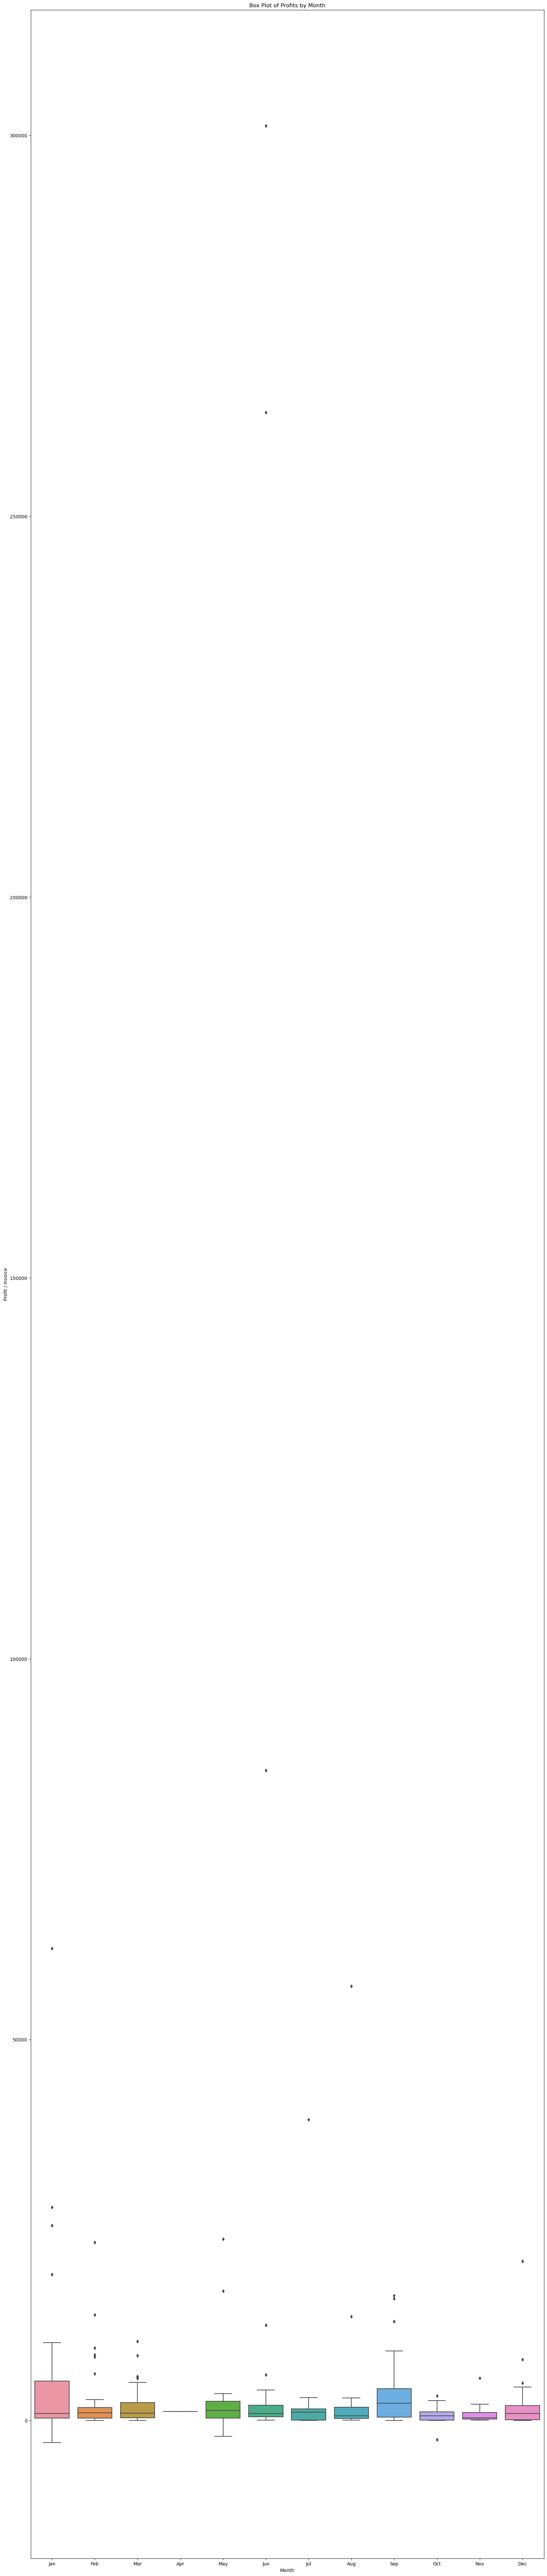

In [8]:
# profit in different months of 2020-21
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"new_project_data.csv") 
df['Month of Purchase'] = pd.to_datetime(df['Month of Purchase'], errors='coerce', format='%d-%b')


month_name_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['Month Name'] = df['Month of Purchase'].dt.month.map(month_name_mapping)

plt.figure(figsize=(20, 100)) 
sns.boxplot(x='Month Name', y='Profit / Invoice', data=df, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Box Plot of Profits by Month')
plt.xlabel('Month')
plt.ylabel('Profit / Invoice')
plt.show()
utliers:

#The box plot indicates that there are significant outliers in profit across different months.
#Outliers, especially in June, contribute to higher median values and an overall wider distribution of profits.
#Monthly Comparison:

#January: Shows higher profits, and it has a wider interquartile range (IQR), suggesting variability in profit.
#April: Indicates lower profits compared to other months. The box plot also shows a relatively smaller IQR, suggesting consistency in lower profits without many extreme values.
#June: Exhibits the highest profits, primarily driven by outliers. The median profit is also relatively high.
#September: Displays a higher median profit compared to other months, and the distribution is not as skewed by outliers.
#Overall Distribution:

#The plot suggests a diverse distribution of profits, with certain months having a wider spread of values due to outliers.
#There is considerable variability in profits, and understanding the nature of these outliers may be crucial for business insights.
#Outlook for Improvement:

#Consider investigating the factors contributing to outliers, especially in June. Understanding the reasons behind exceptionally high profits can help optimize strategies or identify potential issues.
#Explore the reasons for consistently lower profits in April. It may be worthwhile to analyze product sales, market conditions, or any other relevant factors affecting profitability during that month.

In [1]:
import pandas as pd

df = pd.read_csv("final_complete.csv")

selected_columns = [
    'Quantity', 'Amount / Unit', 'Profit / Invoice',
    'Input Tax / Unit', 'Total Input Tax / Unit',
    'Output Tax', 'Total Output Tax Collected',
    'Purchase Price', 'Sell Price',
]
correlation_matrix = df[selected_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)
# the correlation matrix here tells you the relationship between 2 quantites
#  on comparing everything the correlation is said to be high between purchase  price and total input tax/ unit which is 0.999819.
# and the least relationship is with input tax/unit and quantity ie 0.014298.

Correlation Matrix:
                            Quantity  Amount / Unit  Profit / Invoice  \
Quantity                    1.000000       0.014394          0.467063   
Amount / Unit               0.014394       1.000000          0.215191   
Profit / Invoice            0.467063       0.215191          1.000000   
Input Tax / Unit            0.014741       0.996732          0.215663   
Total Input Tax / Unit      0.567922       0.327921          0.912049   
Output Tax                  0.014298       0.993563          0.232953   
Total Output Tax Collected  0.560563       0.316925          0.932325   
Purchase Price              0.568318       0.326988          0.911552   
Sell Price                  0.561048       0.315989          0.931826   

                            Input Tax / Unit  Total Input Tax / Unit  \
Quantity                            0.014741                0.567922   
Amount / Unit                       0.996732                0.327921   
Profit / Invoice                 

In [8]:
# number of products sold.
import pandas as pd
df = pd.read_csv("final_complete.csv")
df['Product Details'].value_counts().sum()

352

In [7]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for 'Amount / Unit'
amount_skewness = skew(df['Amount / Unit'])
amount_kurtosis = kurtosis(df['Amount / Unit'])

print(f"Skewness for 'Amount / Unit': {amount_skewness}")
print(f"Kurtosis for 'Amount / Unit': {amount_kurtosis}")
# so the given data represents positively skewed and leptokurtic data.

Skewness for 'Amount / Unit': 7.001607677891993
Kurtosis for 'Amount / Unit': 65.86844057336741
